---
format: 
  typst:
    margin:
      top: 0in
echo: false
jupyter: python3
filters:
  - typst-function
functions: 
  - place
  - block
---

```{=typst}
#set figure(numbering: none)
#show figure.caption: set align(left)
```

In [1]:
city = "Corvallis"

::: {.block arguments='fill: {{< brand color primary >}}, width: 100%, height: 1.5in, outset: (x: 1.25in)'}

```{=typst}
#show heading.where(level: 1): set text(fill: white, size: 36pt)
```

::: {.place arguments='bottom + left, dy:-0.25in'}

In [2]:
from IPython.display import Markdown
Markdown(f"# {city}")

# Corvallis

:::


In [3]:
import polars as pl
from plotnine import *
from datetime import date
from calendar import month_name, month_abbr
from pyhere import here
from brand_yml import Brand
from pyfonts import load_google_font
from utils import oregon_map

In [4]:
brand = Brand.from_yaml("")

::: {.place arguments='bottom + right, dy:-0.1in'}

<Axes: >

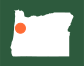

In [5]:
oregon_map(
    city,
    figsize=(1.25, 1.25),
    map_color="white",
    point_color=brand.color.secondary,
    background_color=brand.color.primary,
)

:::

::: 


In [6]:
this_month = date(2025, 5, 1)
highlight_color = brand.color.secondary  # A bright color for highlighting
brand_theme = theme(
    text=element_text(
        fontproperties=load_google_font(
            brand.typography.base.family, brand.typography.base.weight
        ),
        color=brand.color.foreground,
        size=14,
    )
)

In [7]:
tmean_oregon = pl.read_csv(here("data", "tmean-oregon.csv"), schema_overrides={"date": pl.Date})
tmean = tmean_oregon.filter(
    pl.col("city") == city,
)

In [8]:
#| include: false

tmean.head()

city,date,tmean,month,year,tmean_normal,tmean_diff,tmean_direction
str,date,f64,i64,i64,f64,f64,str
"""Corvallis""",2025-05-01,13.276,5,2025,13.3488,0.0728,"""cooler"""
"""Corvallis""",2025-04-01,11.3902,4,2025,10.0785,1.3117,"""warmer"""
"""Corvallis""",2025-03-01,9.00345,3,2025,8.0295,0.97395,"""warmer"""
"""Corvallis""",2025-02-01,4.99405,2,2025,6.1965,1.20245,"""cooler"""
"""Corvallis""",2025-01-01,3.70495,1,2025,5.0605,1.35555,"""cooler"""


In [9]:
this = tmean.filter(pl.col("date") == this_month).row(0, named=True)
Markdown(f"{month_name[this['month']]} {this['year']} was {abs(this['tmean_diff']):.1f}°C {this['tmean_direction']} than usual.")

May 2025 was 0.1°C cooler than usual.

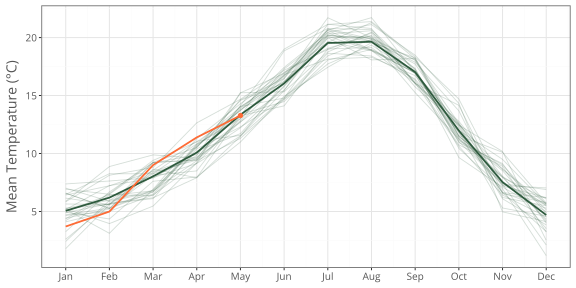

In [10]:
#| fig-cap: "Mean temperatures over the last 30 years. This year is highlighted in orange. The heavy line indicates the 30-year normal."
(
    ggplot(tmean, aes(x="month", y="tmean"))
    + geom_line(aes(group="year"), alpha=0.2, color=brand.color.primary)
    + geom_line(aes(y = "tmean_normal"), color=brand.color.primary, size = 1)
    + geom_line(data=tmean.filter(pl.col("year") == 2025), color=highlight_color, size = 1)
    + geom_point(
        data=tmean.filter(pl.col("date") == this_month), color=highlight_color, size = 2
    )
    + scale_x_continuous(breaks=list(range(1, 13)), labels=list(month_abbr[1:]))
    + labs(x="", y="Mean Temperature (°C)")
    + theme_bw() 
    + brand_theme
    + theme(figure_size = (8, 4))
)